In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [11]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [12]:
df= pd.read_csv('../data/data_endogenouswage/market_endogenouswage_3.csv')
df = df[(df['shares'] >= 0.0009)&(df['shares'] < 1)]

print(df)

     market_ids  firm_ids  characteristic1  characteristic2    prices  \
0             1         1         3.514509         2.417520  3.939073   
1             1         2         2.479225         3.313416  4.100614   
2             1         3         3.785523         2.323309  3.924904   
3             1         4         2.070531         3.440122  4.089133   
4             1         5         3.866694         2.678576  3.908316   
..          ...       ...              ...              ...       ...   
995         100         6         3.462001         3.345028  3.752777   
996         100         7         3.679903         3.759184  3.749009   
997         100         8         2.447640         3.458115  3.905817   
998         100         9         2.811201         3.453787  3.879801   
999         100        10         3.389234         3.203043  4.051873   

     marginal_cost    shares   profits   markups  e_quantity    capital  \
0         3.159443  0.003181  0.002480  1.246762

In [13]:
markups_deloecker = (0.6 * df.prices * df.e_quantity) / (15 * df.labor)
df['markups_deloecker'] = markups_deloecker


df['wage_markdown'] = df.markups/df.markups_deloecker

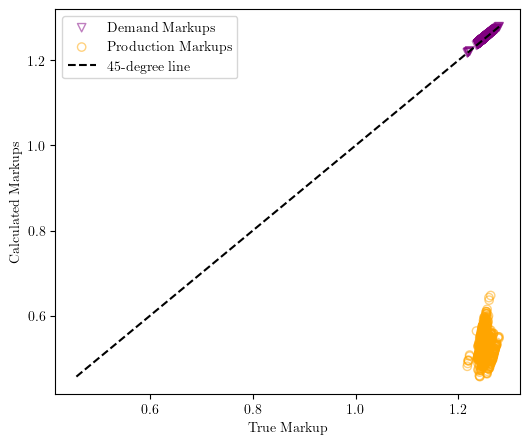

In [14]:


plt.figure(figsize=(6, 5))
# Create the scatter plot

plt.scatter(df.markups, df.markups, 
            color='purple',
              label='Demand Markups', marker='v',
               alpha=0.5, facecolors='none', edgecolors='purple')

plt.scatter(df.markups, df.markups_deloecker, 
            color='purple',
              label='Production Markups', marker='o',
               alpha=0.5, facecolors='none', edgecolors='orange')



# Calculate the minimum and maximum values of the data
min_value = min(df['markups'].min(), df['markups_deloecker'].min())
max_value = max(df['markups'].max(), df['markups_deloecker'].max())

# Plot the 45-degree line
# plt.plot([df['markups'].min(),df['markups'].max()], [df['markups'].min(),df['markups'].max()], color='black', linestyle='--')
plt.plot([min_value, max_value], [min_value, max_value], color='black', linestyle='--', label='45-degree line')

# Set the labels and title
plt.xlabel('True Markup')
plt.ylabel('Calculated Markups')

# Add a legend
plt.legend()

# Display the plot
plt.savefig('../plots/markup_bias_endogwage.pdf')
plt.show()


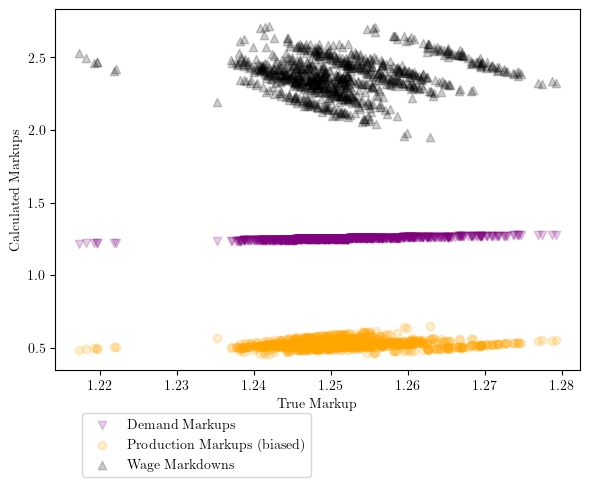

In [31]:
# Plotting the estimated markups for the markdowns 

plt.figure(figsize=(6, 5))
# Create the scatter plot

plt.scatter(df.markups, df.markups, label='Demand Markups', marker='v',
               alpha=0.2,
            color='purple')
plt.scatter(df.markups, df.markups_deloecker, label='Production Markups (biased)', marker='o',
               alpha=0.2,
            color='orange')
plt.scatter(df.markups, df.wage_markdown, label='Wage Markdowns', marker='^',
               alpha=0.2,
            color='black')



# Set the labels and title
plt.xlabel('True Markup')
plt.ylabel('Calculated Markups')

# Add a legend
plt.legend(bbox_to_anchor=(0.5,-0.1))

# Display the plot
plt.tight_layout()

plt.savefig('../plots/decomposition_endogwage.pdf')
plt.show()


In [16]:
df['product'] = df['markups_deloecker'] * df['wage_markdown']


print(df['product'] - df['markups'])

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
995    0.000000e+00
996    0.000000e+00
997   -2.220446e-16
998    0.000000e+00
999    0.000000e+00
Length: 916, dtype: float64


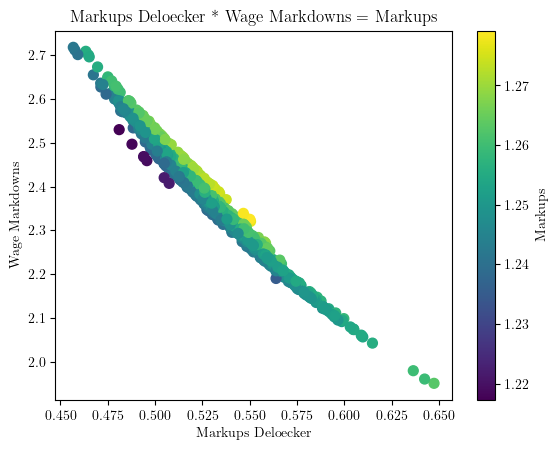

In [17]:


# Assuming you have already defined the DataFrame 'df' with columns: markups, markups_deloecker, and wage_markdowns

# Calculate the product of markups_deloecker and wage_markdowns
df['product'] = df['markups_deloecker'] * df['wage_markdown']

# Create the scatter plot
plt.scatter(df['markups_deloecker'], df['wage_markdown'], c=df['markups'], cmap='viridis', s=50)

# Set colorbar to show the range of markups values
cbar = plt.colorbar()
cbar.set_label('Markups')

# Set axis labels and title
plt.xlabel('Markups Deloecker')
plt.ylabel('Wage Markdowns')
plt.title('Markups Deloecker * Wage Markdowns = Markups')

# Show the plot
plt.show()


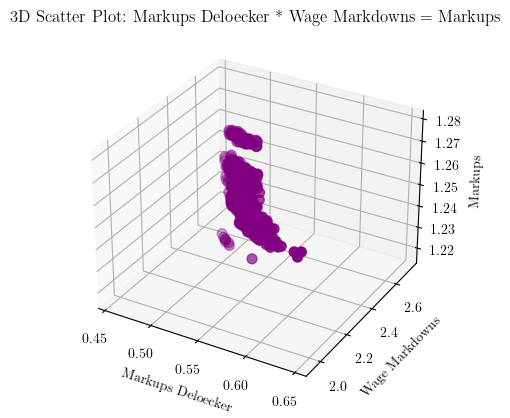

In [18]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with markups_deloecker on the x-axis, wage_markdowns on the y-axis, and markups on the z-axis
ax.scatter(df['markups_deloecker'], df['wage_markdown'], df['markups'], c='purple', s=50)

# Set axis labels and title
ax.set_xlabel('Markups Deloecker')
ax.set_ylabel('Wage Markdowns')
ax.set_zlabel('Markups')
ax.set_title('3D Scatter Plot: Markups Deloecker * Wage Markdowns = Markups')

# Show the plot
plt.show()

In [38]:

# Assuming df is your DataFrame
latex_tables = ''  # Initialize the overall LaTeX content

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    
    # Get specific values per firm
    df_markups = df_firm['markups']
    df_markup_deloecker = df_firm['markups_deloecker']
    df_markdown = df_firm['wage_markdown']
    
    # Create a compact LaTeX table for each firm
    latex_table = pd.DataFrame({'Markups': df_markups, 'Markup (Deloecker)': df_markup_deloecker, 'Markdown': df_markdown}).mean().to_frame().transpose().to_latex(index=False, header=True, float_format="%.3f")
    
    # Add the firm's table to the overall LaTeX content
    latex_tables += f'\\subsubsection*{{Firm {firm}}}\n'
    latex_tables += latex_table + '\n\n'

# Save the overall LaTeX content to a single file
with open('summary_wage_decomp.tex', 'w') as f:
    f.write(latex_tables)

/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_43826/1871112127.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = pd.DataFrame({'Markups': df_markups, 'Markup (Deloecker)': df_markup_deloecker, 'Markdown': df_markdown}).mean().to_frame().transpose().to_latex(index=False, header=True, float_format="%.3f")
/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_43826/1871112127.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = 

In [44]:
# Assuming df is your DataFrame
latex_table = '\\begin{tabular}{c|ccc}\n'
latex_table += 'Firm & Mean Markups & Mean Markups (Deloecker) & Mean Markdowns \\\\\n'
latex_table += '\\hline\n'

for firm in range(1, 11):
    df_firm = df[df['firm_ids'] == firm]
    mean_markups = df_firm['markups'].mean()
    mean_markups_deloecker = df_firm['markups_deloecker'].mean()
    mean_markdown = df_firm['wage_markdown'].mean()
    latex_table += f'{firm} & {mean_markups:.3f} & {mean_markups_deloecker:.3f} & {mean_markdown:.3f} \\\\\n'

latex_table += '\\end{tabular}'

# Save the LaTeX table content to a single file
with open('mean_values_table.tex', 'w') as f:
    f.write(latex_table)